In [39]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [40]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Context

Импорт датасета из csv в pandas

In [41]:
titanic=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/RS_ML/2_data_exploration/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

Проверяем как много NaN в каждом столбце

In [42]:
titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

В столбце Cabin много пропущенных данных, думаю его можно исключить из исследования. Также, считаю что данные из столбца Ticket не являются полезной информацией.

Заменили пропущенные данные в стоблце Fare на среднее значение согласно классу пассажира.

In [48]:
titanic['Fare'] = titanic.groupby('Pclass')['Fare'].transform(lambda k: k.fillna(k.mean()))

In [49]:
titanic.Fare.isnull().sum()

0

In [120]:
titanic['Sex'].replace(['female','male'],[0,1],inplace=True)

In [121]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",1,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",1,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",1,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",1,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",0,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",1,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",1,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",1,51.00,0,1,458654,30.92,NaN,S


# Data exploration

In [130]:
print(titanic.loc[:,'Survived':].corr())

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.289723 -0.507260  0.103895 -0.007587  0.023352  0.187507
Pclass   -0.289723  1.000000  0.198617 -0.259109 -0.051436 -0.041848 -0.417566
Sex      -0.507260  0.198617  1.000000 -0.081684 -0.030627 -0.087666 -0.143495
Age       0.103895 -0.259109 -0.081684  1.000000 -0.112459 -0.125535  0.109223
SibSp    -0.007587 -0.051436 -0.030627 -0.112459  1.000000  0.213126  0.059400
Parch     0.023352 -0.041848 -0.087666 -0.125535  0.213126  1.000000  0.061530
Fare      0.187507 -0.417566 -0.143495  0.109223  0.059400  0.061530  1.000000


In [109]:
sex_pclass_sur1=titanic[titanic['Survived']==1].groupby(['Sex','Pclass']).size()
sex_pclass_sur1

Sex     Pclass
female  1         12357
        2         11753
        3          7116
male    1          5219
        2          3304
        3          3025
dtype: int64

In [81]:
sex_pclass_sur=titanic.groupby(['Sex','Pclass','Survived']).size()
sex_pclass_sur

Sex     Pclass  Survived
female  1       0            3727
                1           12357
        2       0            3530
                1           11753
        3       0            5403
                1            7116
male    1       0            9012
                1            5219
        2       0           10092
                1            3304
        3       0           25462
                1            3025
dtype: int64

In [85]:
sex_pclass_sur_percent=sex_pclass_sur1.groupby(level=[0, 1]).apply(lambda x: 100 * x / float(x.sum()))
sex_pclass_sur_percent

Sex     Pclass  Survived
female  1       0           23.172096
                1           76.827904
        2       0           23.097559
                1           76.902441
        3       0           43.158399
                1           56.841601
male    1       0           63.326541
                1           36.673459
        2       0           75.335921
                1           24.664079
        3       0           89.381121
                1           10.618879
dtype: float64

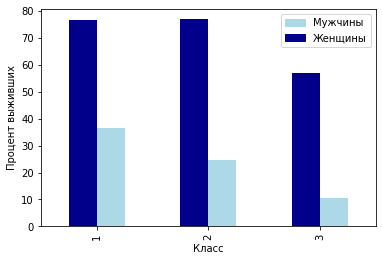

In [171]:
plot1=sex_pclass_sur_percent[1::2].droplevel(2).unstack(level=[0]).plot(kind='bar', color=['darkblue', 'lightblue'])
top_bar = mpatches.Patch(color='lightblue', label='Мужчины')
bottom_bar = mpatches.Patch(color='darkblue', label='Женщины')
plt.legend(handles=[top_bar, bottom_bar])
plot1.set_xlabel("Класс")
plot1.set_ylabel("Процент выживших");

In [86]:
titanic.groupby(['Sex','Survived']).size()


Sex     Survived
female  0           12660
        1           31226
male    0           44566
        1           11548
dtype: int64

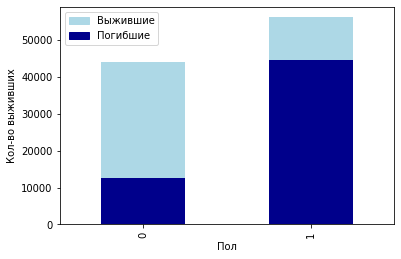

In [169]:
sur_bySex=titanic.groupby(['Sex','Survived']).size()
plot2=sur_bySex.unstack().plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])
top_bar = mpatches.Patch(color='lightblue', label='Выжившие')
bottom_bar = mpatches.Patch(color='darkblue', label='Погибшие')
plt.legend(handles=[top_bar, bottom_bar]);
plot2.set_xlabel("Пол")
plot2.set_ylabel("Кол-во выживших");

In [46]:
ranges = [0,1,10,20,30,40,50,60,70,80,90]
titanic.groupby([pd.cut(titanic.Age, ranges),'Survived']).size()

Age       Survived
(0, 1]    0             815
          1             476
(1, 10]   0            4622
          1            3300
(10, 20]  0            3442
          1            2342
(20, 30]  0           13516
          1            7041
(30, 40]  0            9639
          1            6005
(40, 50]  0            8342
          1            7553
(50, 60]  0            9506
          1            8438
(60, 70]  0            4723
          1            5011
(70, 80]  0             675
          1            1214
(80, 90]  0              10
          1              38
dtype: int64

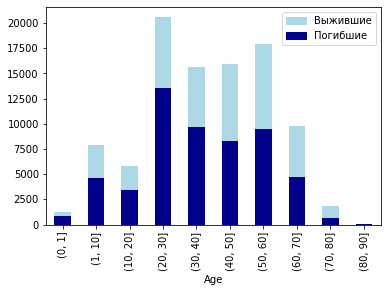

In [170]:
titanic.groupby([pd.cut(titanic.Age, ranges),'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])
top_bar = mpatches.Patch(color='lightblue', label='Выжившие')
bottom_bar = mpatches.Patch(color='darkblue', label='Погибшие')
plt.legend(handles=[top_bar, bottom_bar]);
plot1.set_xlabel("Возраст")
plot1.set_ylabel("Кол-во выживших");

# Summary